# TASK 6: Prediction using Decision Tree Algorithm 

## Author: Kshitij Jaiswal

### GRIPAPRIL21 @ The Sparks Foundation

### Data Science & Business Analytics Intern

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I have created the Decision Tree classifier and visualized it graphically.

### Importing Libraries

In [41]:
%matplotlib inline
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use(["seaborn-bright","Solarize_Light2"])
import warnings
warnings.filterwarnings(action = 'ignore')


### Importing dataset

In [42]:
iris=datasets.load_iris()

In [43]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Visualization comparing various features¶

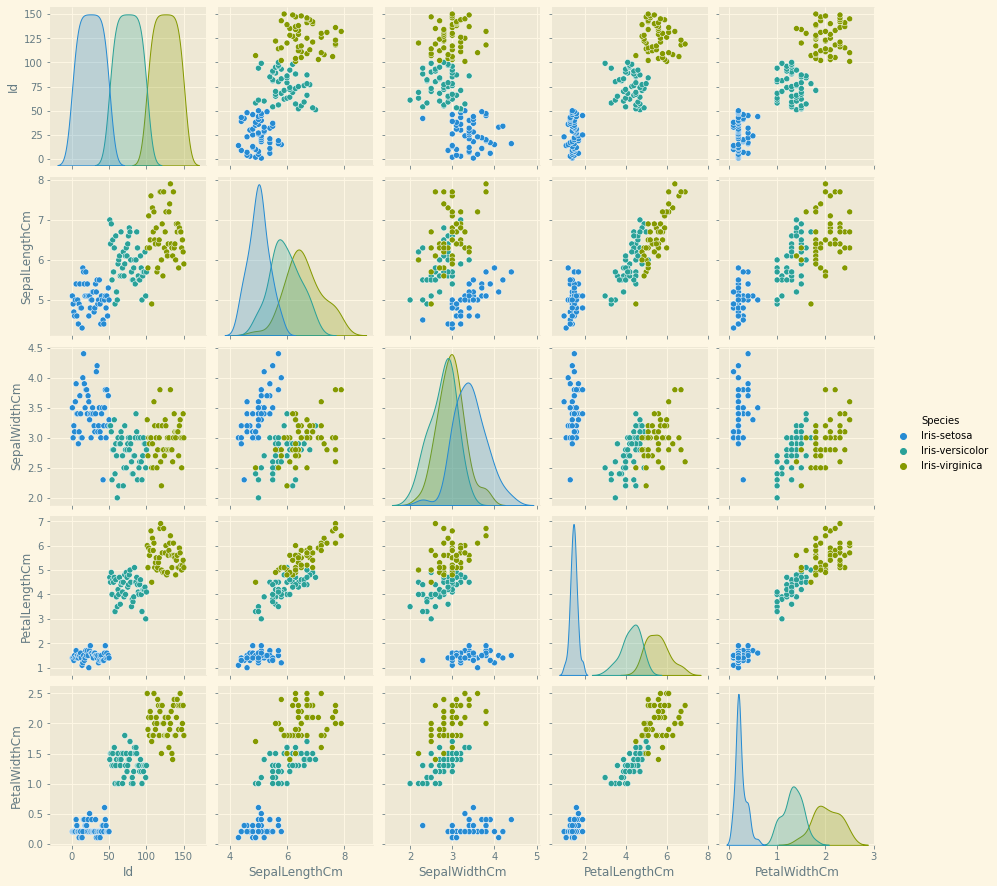

In [46]:
sns.pairplot(data, hue='Species')

### Splitting the Dataset

In [47]:
#separating dependent and independent varibales
X = data.drop(columns = ['Species','Id'])
Y = data['Species']

In [48]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [49]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, train_size = 0.80,random_state = 1, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Model Building, predictions

In [50]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

In [51]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [52]:
predicted_values[:30]

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [53]:
classifier.score(x_test, y_test)

0.9666666666666667

### Evaluation Metrics

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



In [55]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [57]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

### Visualising Decision Tree

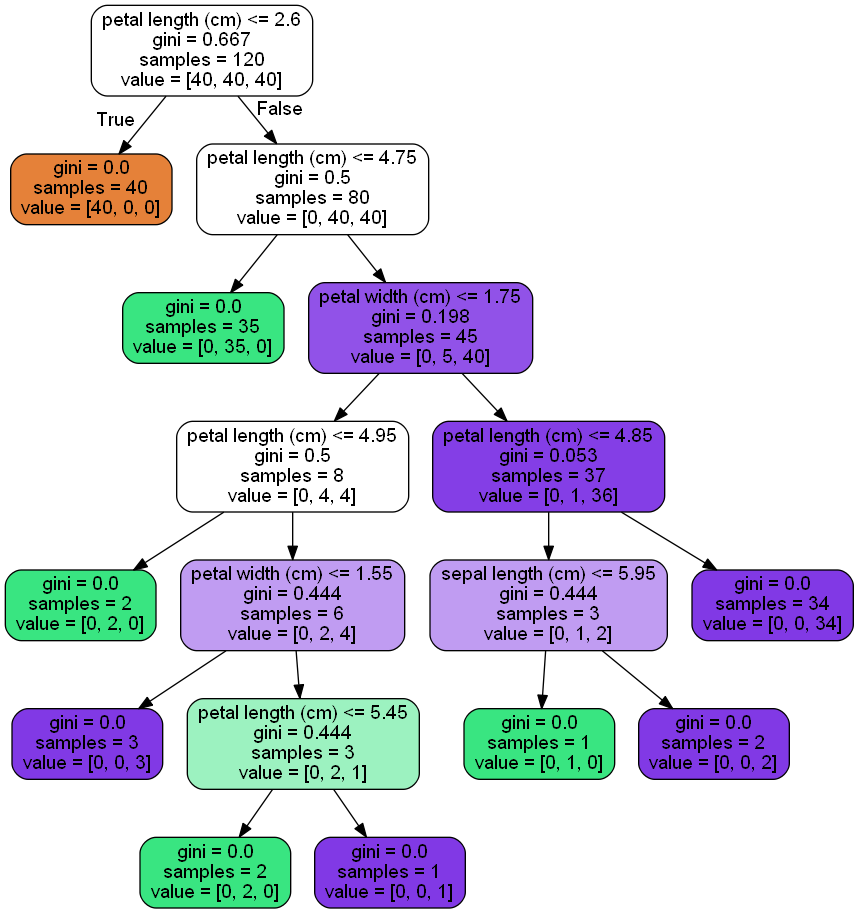

In [58]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
import graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Predicting the class output for some random values of petal and sepal length and width

In [ ]:
print("Class Names = ",iris.target_names)
print('Output = ',classifier.predict([[4.7, 3.2, 1.3, 0.2]]))


### Model accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, predicted_values)
print("Confusion Matrix:")
print(result)
print("Accuracy:",accuracy_score(y_test, predicted_values))

### CONCLUSION